# Airline Customer Satisfaction

Kullanılacak olan veri seti Invistico Airlines tarafından sağlanıyor. Veri seti kaggle sitesi üzerinden elde edildi. Veri setine ulaşmak için [bağlantıya](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction) tıklayabilirsiniz.

Bu veri setinde Invistico Airline's şirketini kullanan müşterilerin uçuşla olan ayrıntılı bilgileri yer alıyor. Veri setinde temel amacımız gelecekteki müşteri memnuniyetlerini tahmin etmek ve bu sayede hizmet kalitesini arttırmak olacaktır. Bahsettiğimiz üzere veri setinde bulunan müşteri uçuş detaylarını inceleyerek başlayalım.

1. `satisfaction`: Müşterinin genel memnuniyet düzeyi. "satisfied" veya "dissatisfied" seçeneklerinin bulunduğu kategorik bir değişkendir.
2. `Gender`: Müşterinin cinsiyeti. "Male" veya "Female" seçeneklerinin bulunduğu kategorik bir değişkendir.
3. `Customer Type`: Müşterinin "loyal customer" mı yoksa "disloyal customer" mı olduğu değişkendir.
4. `Age`: Müşterini yaşı
5. `Type of Travel`: "Personal Travel" veya "Business travel" gibi seyahat türü.
6. `Class`: "Eco" veya "Business" gibi seyahat sınıfı.
7. `Flight Distance`: Uçuş Mesafesi
8. `Seat Comfort`: Müşterinin koltuk konforuna ilişkin değerlendirmesi.
9. `Departure/Arrival time convenient: `  Bu sütun, müşterinin kalkış ve varış saatlerinin rahatlığından duyduğu memnuniyeti ifade eder.
10. `Food and Drink`: Müşterinin yiyecek ve içecek kalitesine ilişkin değerlendirmesi.
11. `Gate Location`: Müşterinin kapı konumuna ilişkin değerlendirmesi.
12. `Inflight Wifi Service`: Uçak içi Wi-Fi hizmetine ilişkin müşteri derecelendirmesi.
13. `Inflight Entertainment`: Uçak içi eğlence seçeneklerine ilişkin müşteri derecelendirmesi.
14. `Online support`: Çevrimiçi müşteri desteğinin müşteri değerlendirmesi.
15. `Ease of Online booking`: Müşterinin çevrimiçi rezervasyon kolaylığına ilişkin değerlendirmesi.
16. `On-board service`: Havayolu tarafından sağlanan uçakta hizmete ilişkin müşteri derecelendirmesi.
17. `Legroom service`: Uçuş sırasında sağlanan bacak odası hizmetine ilişkin müşteri derecelendirmesi.
18. `Baggage handling`: Müşterinin bagaj taşıma derecelendirmesi.
19. `Checkin service`: Müşterinin check-in hizmetine ilişkin değerlendirmesi.
20. `Cleanliness`: Kabin temizliğine ilişkin müşteri derecelendirmesi.
21. `Online boarding`: Çevrimiçi biniş sürecine ilişkin müşteri derecelendirmesi.
22. `Departure Delay in Minutes`: Her uçuş için dakika cinsinden kalkış gecikmesi.
23. `Arrival Delay in Minutes`: Her uçuş için dakika cinsinden varış gecikmesi.

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [5]:
from sklearn.tree import DecisionTreeClassifier

## Veri Seti Yüklemesi

In [6]:
df = pd.read_csv("Invistico_Airline.csv")

In [7]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Görüldüğü üzere veri setini sorunsuz bir şekilde çağırdık. Ve ilk beş veriyi örnek olarak gösterdik.

## Veri Seti İncelemesi

Öncelikle veri setimizde kaç adet veri ve kaç adet değişken var bulmalıyız.

In [8]:
df.shape

(129880, 23)

"shape" methodu ile öğrendik ki veri setinde 129880 adet veri ve 23 adet sütun bulunmaktadır.Şimdi de bu değişkenlerin hangi veri tipinde olduğunu ve adlarını bulalım.

## Veri Tipi İncelemesi

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Görüyoruz ki veri setinde 5 adet object, 1 adet float ve 17 adet integer veri tipi bulunmakta. 

Veri setimizde null değer var mı kontrol etmemiz gerekmektedir.

## Null Değer Kontorlü 

In [10]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Elde ettiğimiz çıktıya baktığımızda null değerlerin olduğu tek sütun Arrival Delay in Minutes olarak belirlenmiştir. Bu sütunda 393 adet null değer vardır.

Şimdi bu null değerlerin diğer geçerli verilere oranını bulup ne yapacağımıza karar vermemiz gerekmektedir.

In [11]:
df.isna().sum() / df.shape[0]

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

Aldığımız outputa baktığımızda null değerlerin "Arrival Delay in Minutes" sütunundaki oranı yaklaşık olarak %0.3 olarak elde edilmiştir. Bu oranın oldukça düşük olduğunu kabul ediyoruz. Bu yüzden bu null değerleri drop edebiliriz. Bu yöntem bize daha iyi analizler yapma imkanı tanıyacaktır.

In [12]:
df.dropna(inplace=True)

print("Null Değer Kontrolü")
df.isna().sum()


Null Değer Kontrolü


satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Görüyoruz ki artık veri setimizde herhangi bir null dğer bulunmamaktadır. Double check yapmak daha sağlıklı ilerlememizi sağlayacaktır bu yüzden veri setimizin boyutunu kontrol etmek doğru bir adım olacaktır.

In [13]:
df.shape

(129487, 23)

Evet görüldüğü üzere sadece null değerler drop edilmiştir. 

Veri tiplerinden daha önce bahsetmiştik. Şimdi bu değişkenleri istatiksel olarak incelememiz gerekmekte. Bunun için "describe" methodunu kullnacağız fakat bahsettiğimiz üzere 5 adet object veri tipine sahip değişkenler bulunmakta. Buna çözüm olarak değişkenleri "numeric" ve "categoric" olarak ayırabiliriz. Bunun için pandas'ın sağladığı bir method bulunmakta. "select_dtypes" methodu. 

## İstatiksel Analiz

In [14]:
numeric_col = df.select_dtypes(exclude = object)  # object veri tipinde olanlar dahil edilmedi.
categoric_col = df.select_dtypes(include = object) # object veri tipinde olanlar dahil edildi.

In [15]:
print("Numeric Columns")
numeric_col.info()

Numeric Columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129487 non-null  int64  
 1   Flight Distance                    129487 non-null  int64  
 2   Seat comfort                       129487 non-null  int64  
 3   Departure/Arrival time convenient  129487 non-null  int64  
 4   Food and drink                     129487 non-null  int64  
 5   Gate location                      129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Inflight entertainment             129487 non-null  int64  
 8   Online support                     129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  On-board service                   129487 non-null  int64  
 11  Leg room service       

In [16]:
print("Categoric Columns")
categoric_col.info()

Categoric Columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   satisfaction    129487 non-null  object
 1   Gender          129487 non-null  object
 2   Customer Type   129487 non-null  object
 3   Type of Travel  129487 non-null  object
 4   Class           129487 non-null  object
dtypes: object(5)
memory usage: 5.9+ MB


Evet verilerimizi ayırdıktan sonra artık istatiksel olarak değerlendirmeleri yapabiliriz.

In [17]:
numeric_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


Elde ettiğimiz verileri sütun sütun inceleyelim.

1.  **Age**:
    - Yaş ortalamasına baktığımızda yaklaşık olarak 39 değeri elde edilmiştir. Yaş ortalaması orta yaş olarak belirlenebilir.
    - Minimum değerin 7 olduğu görülmektedir. Anlaşılıyor ki yolcular arasında küçük yaştaki çocuklar da bulunmaktadır.
    - Veri setinin ilk çeyreğinde yaş değeri 27'dir.
    - Ortanca değerin 40 olduğu belirlenmiştir. Yani yaş değerleri çoğunluk olarak küçük değerlerden oluşmaktadır.
    - Veri setinin üçüncü çeyreğinde yaş değeri 51'dir. Veri setinin üst kısımlarında daha büyük yaş değerleri bulunmaktadır.
    - Maximum yaş değeri 85 olarak elde edilmiştir. 
2. **Flight Distance**:
    - Mesafelerin ortalaması 1981'dir.
    - std değerinin oldukça yüksek olduğu görülmekte yani uçuş mesafesi oldukça geniş bir yayılıma sahiptir.
    - Minimum gidilen mesafe 50'dir.
    - İlk çeyrekte gidilen mesafe 1359'dur. 
    - İkinci çeyrekte 1924 ve üçüncü çeyrekte 2543 mil olarak elde edilmiştir.
    - Maximum gidilen mesafe 6951'dir. Maximum değer ve çeyreklerden de anlaşıldığı üzere uçuş mesafesi genel olarak küçük 2500 ve altı değerlerden oluşmaktadır.
3. **Seat Comfort**:
    - Ortalama değerin yaklaşık olarak 3 olduğu görülmektedir.Ortalama bir konfor seviyesi var demektir.
    - Maximum ve minimum değerleri 5 ve 0 olduğunu zaten biliyoruz.
    - İlk çeyrekte değerlendirmeler 2, ikinci çeyrekte 3 ve üçüncü çeyrekte 4 olarak belirlenmiştir.
    - Üçüncü çeyrek değerinin 4 olduğu göz önüne alındığında veri setinin üst yarısının yüksek konfor puanlarına sahip olduğu söylenebilir.
4. **Departure/Arrival time convenient**:
    - Seat Comfort değişkeni ile aynı değerlendirmeler yapılabilir.
5. **Food and Drink**:
    - Seat Comfort değişkeni ile aynı değerlendirmeler yapılabilir.
6. **Gate Location**:
    - Seat Comfort değişkeni ile aynı değerlendirmeler yapılabilir.
7. **Inflight wifi service**:
    - Seat Comfort değişkeni ile aynı değerlendirmeler yapılabilir.
8. **Inflight entertainment**:
    - Ortalama değerin 3.4 olduğu söylenebilir. Gayet yüksek bir ortalamadır.
    - İkinci çeyreğin 4 olduğu gözlemlendi. Yani veri setini üst yarısının daha yüksek eğlence puanlarına sahip olduğu söylenebilir.
9. **Online support**:
    - Ortalama değeri 3.5 olduğu için oldukça yüksek değerlendirmeler vardır. 
    - İlk çeyreğinde zaten elde edilen değer 3'tür. Bundan dolayı çoğu kullanıcının orta veya yüksek puanlar verdiği söylenebilir. 
10. **Ease of Online booking**:
    - İkinci çeyreği 4 olduğu için kullanıcıların en az yarısı 4 ve 5 değerlendirmeler yapmıştır.
11. **On-board service**:
    - Inflight entertainment değişkeni ile aynı değerlendirmeler yapılabilir.
12. **Leg room service**
    - Ease of Online booking değişkeni ile aynı değerlendirmeler yapılabilir.
13. **Baggage handling**:
    - Burada diğer değişkenlerden farklı olarak minimum değer 1'dir. Yani 0 puan verecek kadar kötü bir hizmet verilmemiş demektir.
    - İlk çeyrekteki değer 3 olduğu için müşterilerin yarısından fazlası bagaj taşıma hizmetine 3 üstü değerlendirme yapmışlardır. Genel bir memnuniyet var diyebiliriz.
14. **Checkin service**:
    - Baggage handling değişkeniyle olan farkı minimum değerdir. Burada yine minimum değer 1'dir. 
    - İlk çeyrek 3 değerinde olduğu için yine müşterilerin yarısından fazlası 3 ve üstü puanlama yapmıştır dolayısıyla müşteriler check-in servisinden genel olarak memnun kalmışlardır.
15. **Cleanliness**:
    - Puanlanabilen değişkenler arasında en yüksek ortalamaya sahip bir değişkendir. Müşterilerin genel olarak en memnun olduğu hizmetin temizlik olduğunu çıkarabiliriz.
    - İlk çeyrekteki değer 3 olduğu için yarıdan fazla değerlendirmenin 3 ve üstü puanlama yapmıştır.
16. **Online boarding**:
    - Bu değişken için yine min ve max değerler yine 0 ve 5 olduğu görülmüştür. 
    - İkinci çeyrekteki değerin 4 olduğunu bulduk. Bundan dolayı müşterilerin en az yarısı 4 ve üstü puanlama yapmıştır.
17. **Departure Delay in Minutes**:
    - Max ve min değerlere baktığımızda çok fark olduğu gözlemlendi. Buna dayanarak ortalama değerin yaklaşık 15 olduğu bilindiği için küçük gecikmeler yaşandığı çıkarımı yapılabilir.
    - İkinci çeyrekliğin 0 olduğu elde edildi. Bunu baz alarak veri setinin ortasında yer alan uçuşların genellikle plana uygun şekilde kalkış yaptığı söylenebilir.
18. **Arrival Delay in Minutes**:
    - Departure Delay in Minutes değişkeni ile yaklaşık olarak aynı değerlendirmeler yapılabilir.


Şimdi kategorik değişkenler için analiz yapacağız.

In [18]:
categoric_col.astype('object').describe().T

,count,unique,top,freq
satisfaction,129487,2,satisfied,70882
Gender,129487,2,Female,65703
Customer Type,129487,2,Loyal Customer,105773
Type of Travel,129487,2,Business travel,89445
Class,129487,3,Business,61990


Burada frequency değerlerini elde etmiş olduk. Daha iyi yorum yapabilmek için bu top değerlerin toplam veri setinde olan yüzdesini de bulalım. Bunu için bir fonksiyon yazarak birden fazla kategori için istediğimiz değerleri elde edebiliriz.

In [19]:
def freq_cal(column, category):
    category_data = df[df[column] == category]
    total_category_count = category_data.shape[0]
    percentage = (total_category_count / df.shape[0]) *100
    return percentage

col_cat = {
    'Gender': 'Female',
    'satisfaction': 'satisfied',
    'Customer Type': 'Loyal Customer',
    'Type of Travel': 'Business travel',
    'Class': 'Business'
}
for column, category in col_cat.items():
    percentage = freq_cal(column, category)
    print(f"The percentage of \"{category.lower()}\" in the \"{column.upper()}\" category is: {percentage:.2f}%")

The percentage of "female" in the "GENDER" category is: 50.74%
The percentage of "satisfied" in the "SATISFACTION" category is: 54.74%
The percentage of "loyal customer" in the "CUSTOMER TYPE" category is: 81.69%
The percentage of "business travel" in the "TYPE OF TRAVEL" category is: 69.08%
The percentage of "business" in the "CLASS" category is: 47.87%


1. **"satisfaction"** kategorisi en fazla "satisfied" değeri içeriyor. Toplamda 70882 kişi "satisfied" olarak uçuşu sonlandırmış. Veri setindeki müşterilerin %50.74'ü havayolu şirketinden memnun olmuştur. 

2. **"gender"** kategorisinde en fazla olan değer "Female" değeridir. Bu değer veri setinin %54.74'üne eş düşmektedir. Müşterilerden 65703 kişi kadındır.

3. **"Customer Type"** kategorisinde en fazla olan değer "Loyal Customer" olarak belirtilmiş. Bu kategori veri setinin %81.69'unu oluşturmaktadır. Yani müşterilerin %81.69'u sadık müşterilerden oluşturmaktadır.

4. **"Type of Travel"** kategorisinde en fazla olan değer " Business Travel" olara ele alınmış. Bu kategori veri setinin %69.08'ini kaplamaktadır. Sonuç olarak havayolu şirketi ilen yapılan uçuşların %69.08'i İş Gezisi olarak yer almıştır.

5. **"Class"** kategorisinde en fazla olan değer "Business" olarak belirlenmiş. Bu kategori veri setinin %47.87'sini oluşturmaktadır. Müşterilerin %47.87'i uçuşlarını Business Class olarak yapmıştır.

## Duplicate Veri Kontrolü

In [20]:
duplicates = df[df.duplicated()]
print("Duplicate satır sayısı:", duplicates.shape[0])

Duplicate satır sayısı: 0


## Veri Görselleştirmesi

İstatiksel analiz yaparken zaten kategorik veriler için birkaç yüzdelik olarak da yorumlar yaptık ama bunları görselleştirerek yaptığımızda daha net ve iyi yorumlar alabiliriz.

### Satisfaction

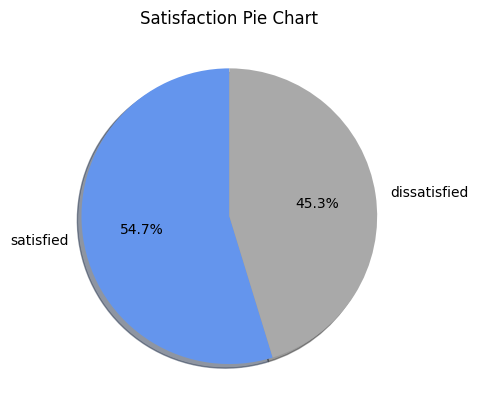

In [21]:
labels = ["satisfied", "dissatisfied"]
values = df["satisfaction"].value_counts().values
colors = ['cornflowerblue','darkgray']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Satisfaction Pie Chart')
plt.show()

Veri setinde bize verilen memnun olma ya da olmama durumu müşteriler arasında nasıl dağıldı bu pie chart ile daha net görebiliriz. Müşterilerin çoğunluğu memnun olarak ayrılmışlar.

### Gender

Kadın ve erkek dağılımı nasıl onu da inceleyelim. 

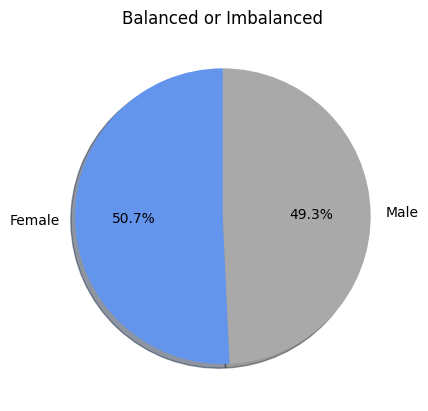

In [22]:
labels = ["Female", "Male"]
values = df["Gender"].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Balanced or Imbalanced')
plt.show()

Kadın ve erkek dağılımının da ayrıca nasıl dağılım sağladığını görebiliyoruz. Neredeyse eşit olarak dağılım sağladığını söyleyebiliriz.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

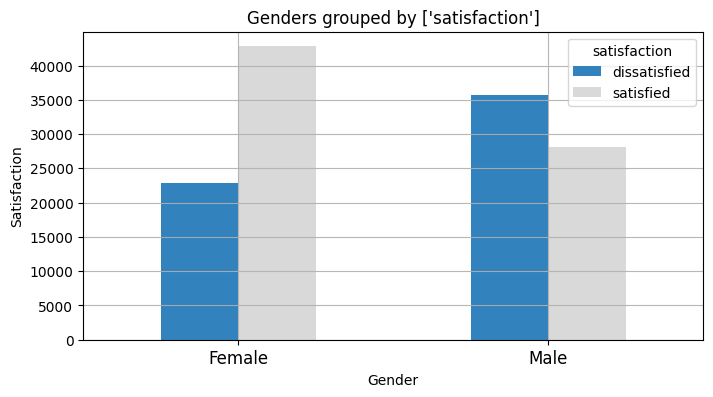

In [23]:
item=['satisfaction']

df.groupby(['Gender'])[item].value_counts().unstack().plot.bar(figsize=(8,4), cmap='tab20c')
plt.title(f'Genders grouped by {item}')
plt.ylabel('Satisfaction')
plt.grid(True, linestyle='-', alpha=0.9)
plt.xticks(rotation = 0, fontsize = 12)


Görüyoruz ki kadınların ve erkeklerin memnuniyet dağılımları çok farklı dağılmış. Kadınların uçuşlarından daha memnun olduklarını görebiliyoruz. Erkeklerin ise tam tersi memnuniyetsizlik oranlarının daha fazla olduğu görülmüştür.

### Customer Type

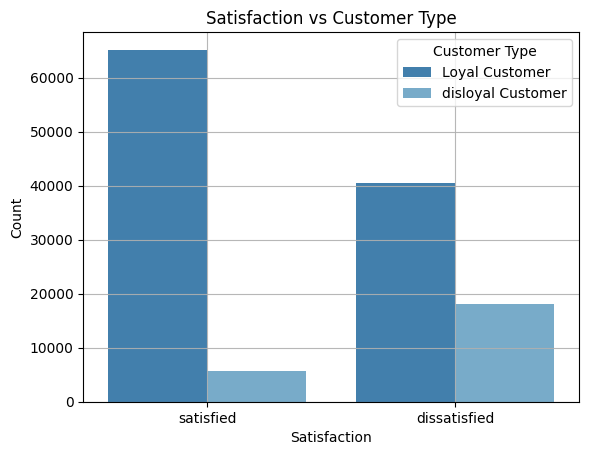

In [24]:
sns.countplot(x='satisfaction', hue='Customer Type', data=df, palette = "tab20c")
plt.title('Satisfaction vs Customer Type')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.grid(True, linestyle='-', alpha=0.9)

plt.show()

Görüldüğü üzere sadık müşterilerin çoğunlukla memnun olduğu görülmektedir. Ayrıca havayolu şirketinin en çok kazandığı müşterileri yeni müşteriler değil sadık müşterilerdir. Sadık müşteriler için özel teklifler yapılırsa memnuniyet oranlarında artış yakalanabilir.

Yeni müşteriler için de farklı kampanyalar veya cazip teklifler yapılması durumunda yeni müşterin hem bilet satışında hem de memnuniyet artışında yükselişi görmesi mümkün olabilir.

### Age

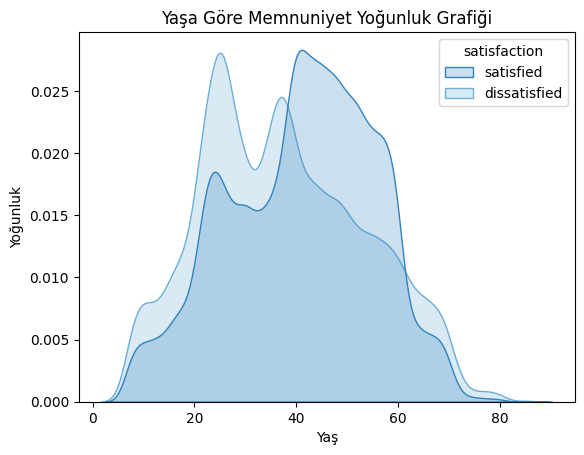

In [25]:
sns.kdeplot(data=df, x='Age', hue='satisfaction', fill=True, common_norm=False, palette='tab20c')

plt.title('Yaşa Göre Memnuniyet Yoğunluk Grafiği')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')

plt.show()

Grafikten anladığımız üzere havayolu şirketinden memnun olan müşterilerin yaşları en çok 40 ve 60 yaşları arasında olan müşteriler olduğu ortaya çıkmıştır. Memnun olmayan müşterilerin ise yaşları genellikle 20 ve 40 yaşları arasında olan müşteriler olduğu gözlemlenmiştir.

Genç müşteri sınıfında olan müşteriler için de kampanya, özel teklif veya eğlence seviyesini arttırabilecek hizmetlerin sağlanması genç müşterilerin daha fazla memnuniyet oranına erişebileceği söylenebilir.

### Type of Travel

Text(0, 0.5, 'Counts')

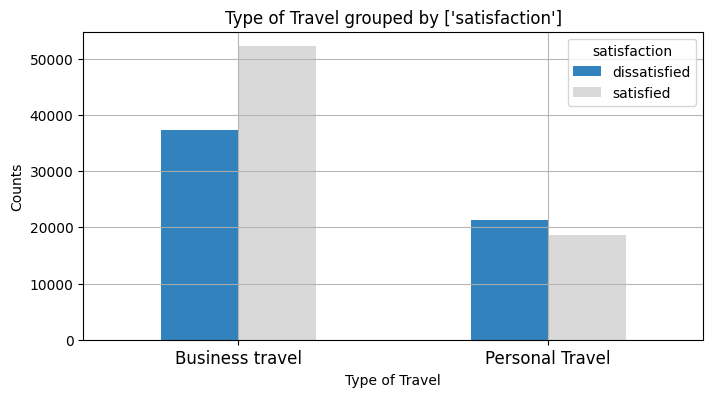

In [26]:
item=['satisfaction']

df.groupby(['Type of Travel'])[item].value_counts().unstack().plot.bar(figsize=(8,4), cmap='tab20c')
plt.title(f'Type of Travel grouped by {item}')
plt.grid(True, linestyle='-', alpha=0.9)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Counts')

Seyahatlerin çoğunluğunun iş seyahatleri olduğu görülüyor. Kişisel seyahat yapan müşterilerin neredeyse yarı yarıya memnun ve memnun olmadıklarını görebiliyoruz. 
İş seyahati yapan kişilerin de çoğunlukla seyahatlerinden memnun kaldığı görülmektedir.

İş seyahatlerini yapan müşterilerin kaçının "loyal customer" sınıfında olduğuna bakarak bu müşterilerin memnuniyet oranlarının nasıl daha fazla arttırılabileceği konusunda daha iyi fikirler üretebiliriz.

Text(0, 0.5, 'Counts')

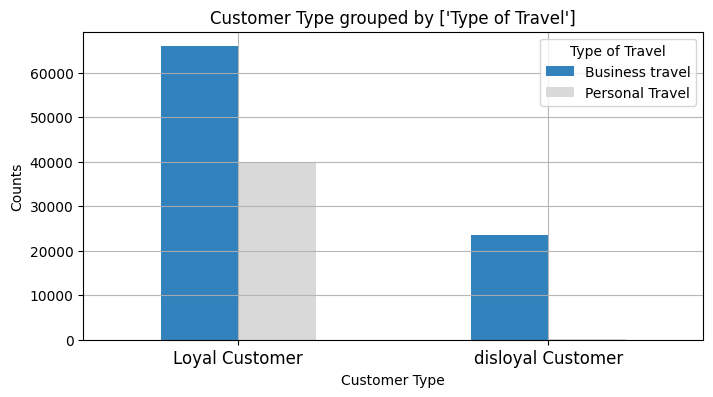

In [27]:
item=['Type of Travel']

df.groupby(['Customer Type'])[item].value_counts().unstack().plot.bar(figsize=(8,4), cmap='tab20c')
plt.title(f'Customer Type grouped by {item}')
plt.grid(True, linestyle='-', alpha=0.9)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Counts')


Görünen o ki sadık olmayan müşterilerin hepsi iş seyahati yapmış. Buradan sadık olmayan müşteriler için kişisel geziden daha çok iş seyahatleri için iyileştirmeler yapılabilir.

### Class

Text(0, 0.5, 'Counts')

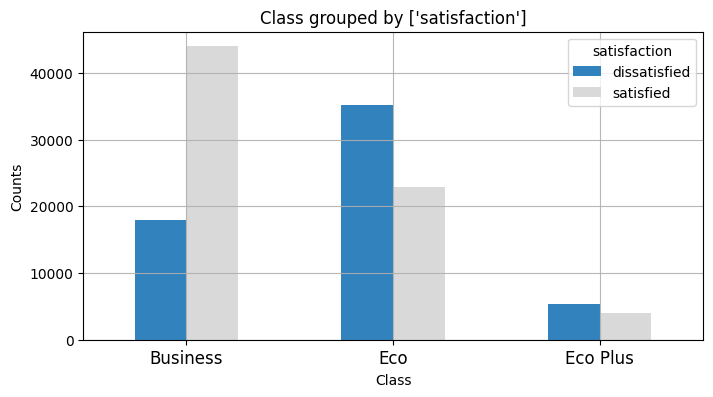

In [28]:
item=['satisfaction']

df.groupby(['Class'])[item].value_counts().unstack().plot.bar(figsize=(8,4), cmap='tab20c')
plt.title(f'Class grouped by {item}')
plt.grid(True, linestyle='-', alpha=0.9)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Counts')


Grafikten anlaşıldığı üzere en fazla memnun olmayan sınıf "eco" sınıfıdır. 

### Flight Distance

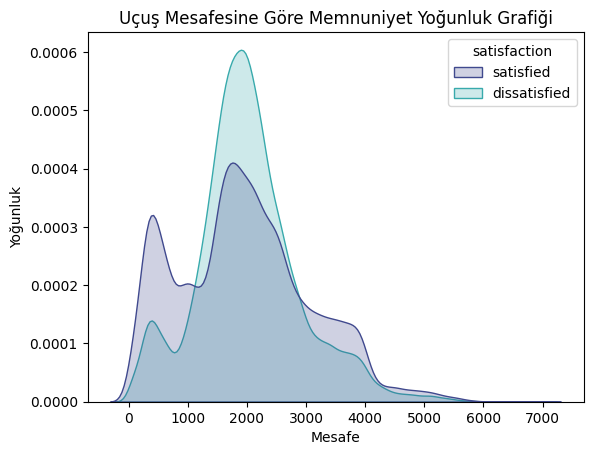

In [29]:
sns.kdeplot(data=df, x='Flight Distance', hue='satisfaction', fill=True, common_norm=False, palette='mako')

plt.title('Uçuş Mesafesine Göre Memnuniyet Yoğunluk Grafiği')
plt.xlabel('Mesafe')
plt.ylabel('Yoğunluk')

plt.show()

Grafikten anladığımız üzere memnuniyetin en fazla yoğunlukta olduğu aralık 2000 olduğu gözlemleniyor. Fakat aynı zamanda memnuniyetsizliğin de en yüksek olduğu aralık bu aralıktır. Bu aralıktan sonra mesafe arttıkça memnuniyet seviyesinin giderek azaldığını görebiliriz.

### Derecelendirme Sütunları

In [30]:
değer_sütun = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
               'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
               'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
               'Online boarding']

Daha doğru yorumlar yapmak için object olan değişkenleri int veri tipine dönüştürmemiz gerekmektedir. Object veri tiplerimiz nelerdi tekrar hatırlayalım.
1. Gender
2. Customer Type
3. Type of Class
4. Class
5. satisfaction 

In [31]:
dictionary={'dissatisfied':0,'satisfied':1} 
df.replace(to_replace=dictionary, inplace=True)

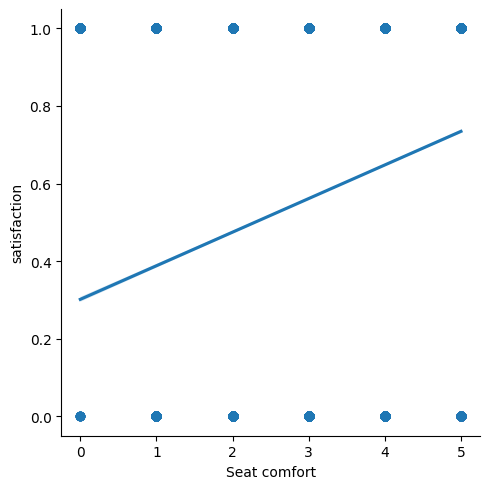

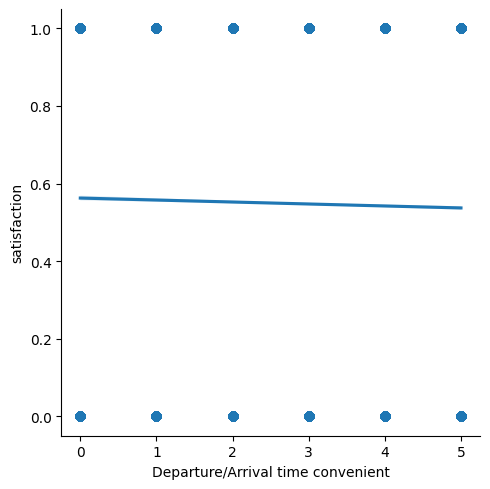

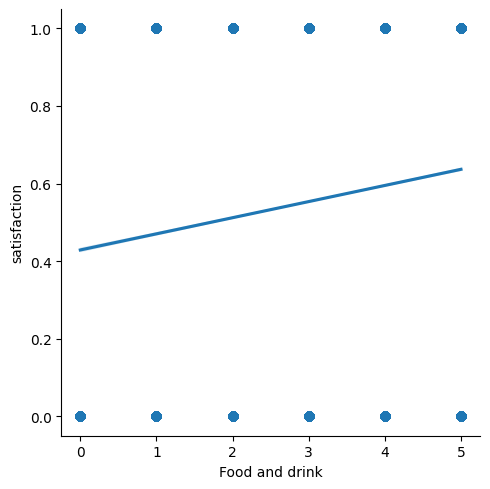

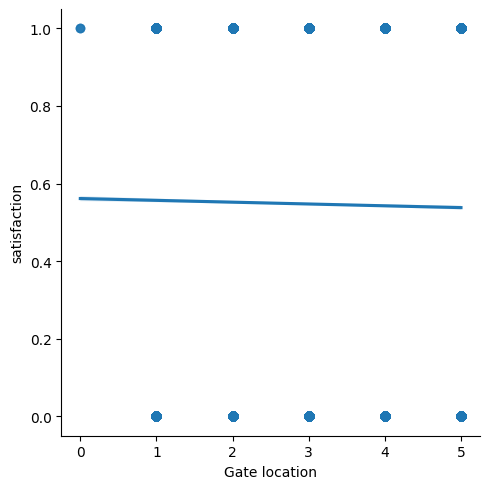

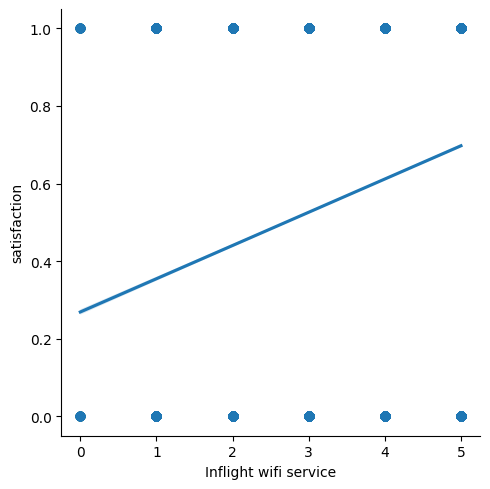

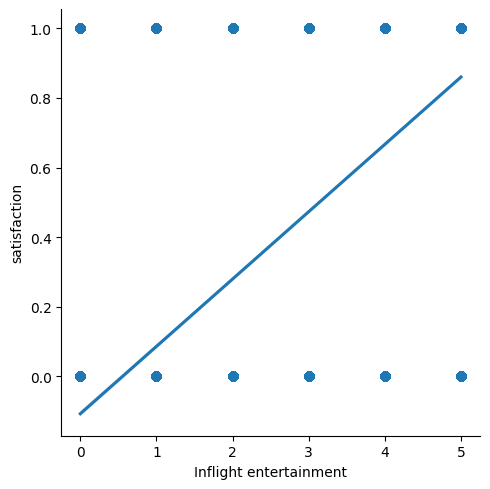

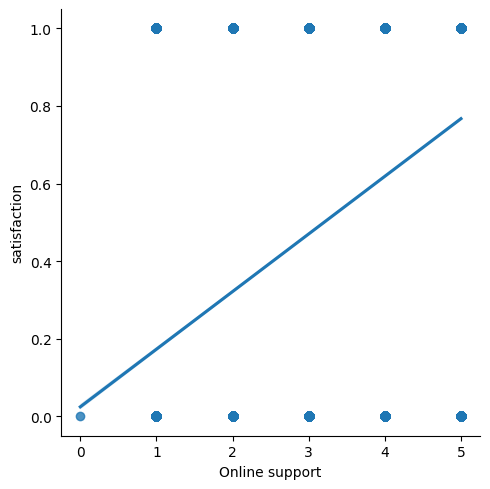

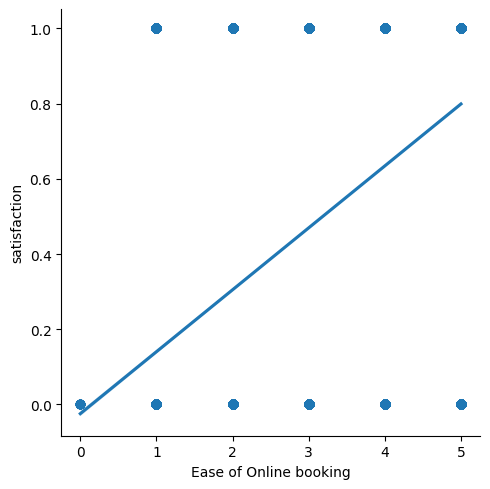

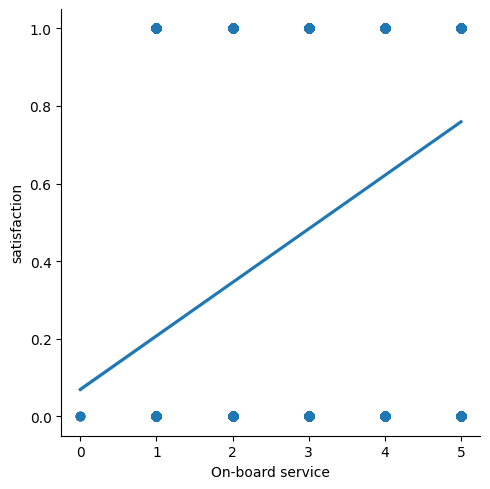

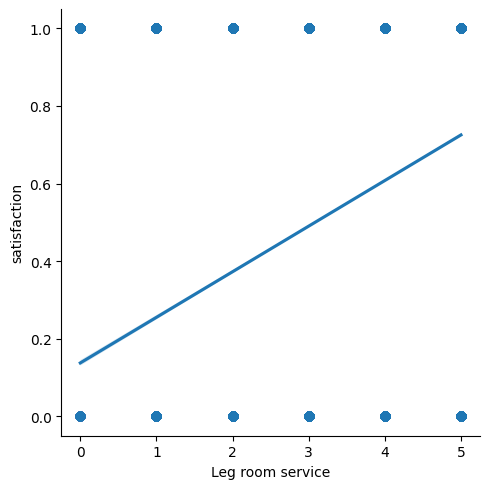

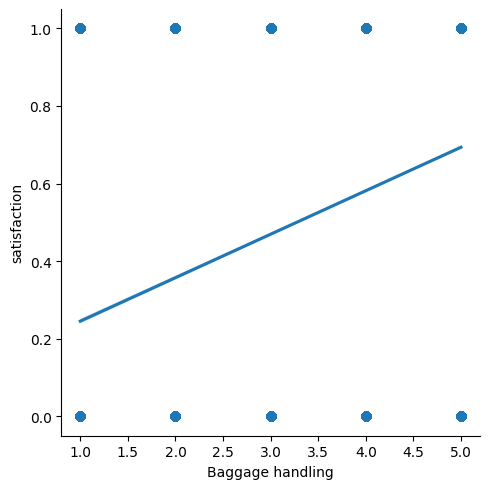

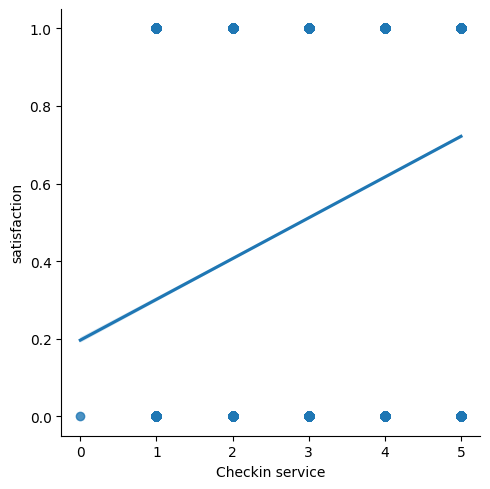

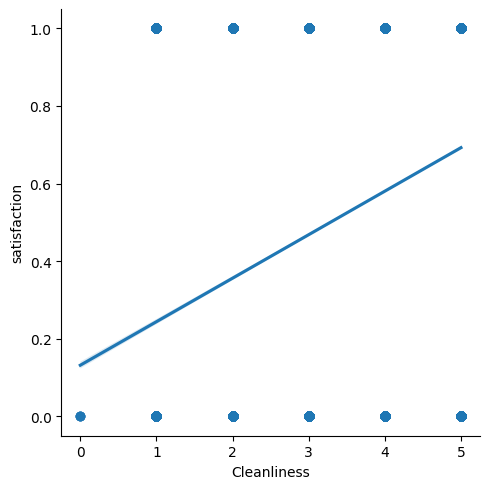

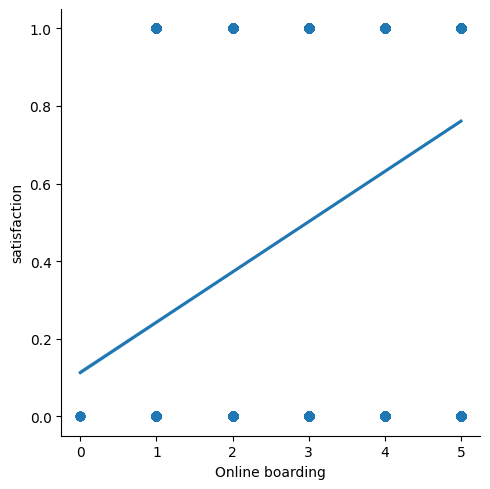

In [32]:
for deger_sutunu in değer_sütun:
    sns.lmplot(x = deger_sutunu, y= "satisfaction", data=df)

"satisfaction" değerlendirmesi ile derecelendirme sütunları arasındaki bağlantıları daha net yapmak için bu grafiklerden yararlanabiliriz. 

Bu derecelendirmelerin hangileri müşteri memnuniyeti üzerinde olan etkilerini bu grafiklerden analiz edeceğiz. Etki eden derecelendirmelerin listesini aşağıda gösterebiliriz.

1. `Seat Comfort`
2. `Inflight wifi service`
3. `Inflight entertainment` (en etkili özellik)
4. `Online support`
5. `Ease of online booking`
6. `On-board service`
7. `Leg room service`
8. `Bagging handling`
9. `Checkin Service`
10. `Cleanliness`
11. `Online Boarding`

Etkisi olanların olduğu gibi etkisi olmayan değişkenler de bulunmakta. Bunlar da iki adet diyebiliriz. 
1. `Gate Location`
2. `Departure/Arrival Time Convenient`
3. `Food and Drink`

### Correlation Analysis

In [33]:
df['Gender']  = pd.factorize(df['Gender'])[0] 
df['Customer Type']  = pd.factorize(df['Customer Type'])[0] 
df['Type of Travel']  = pd.factorize(df['Type of Travel'])[0] 
df['Class']  = pd.factorize(df['Class'])[0]

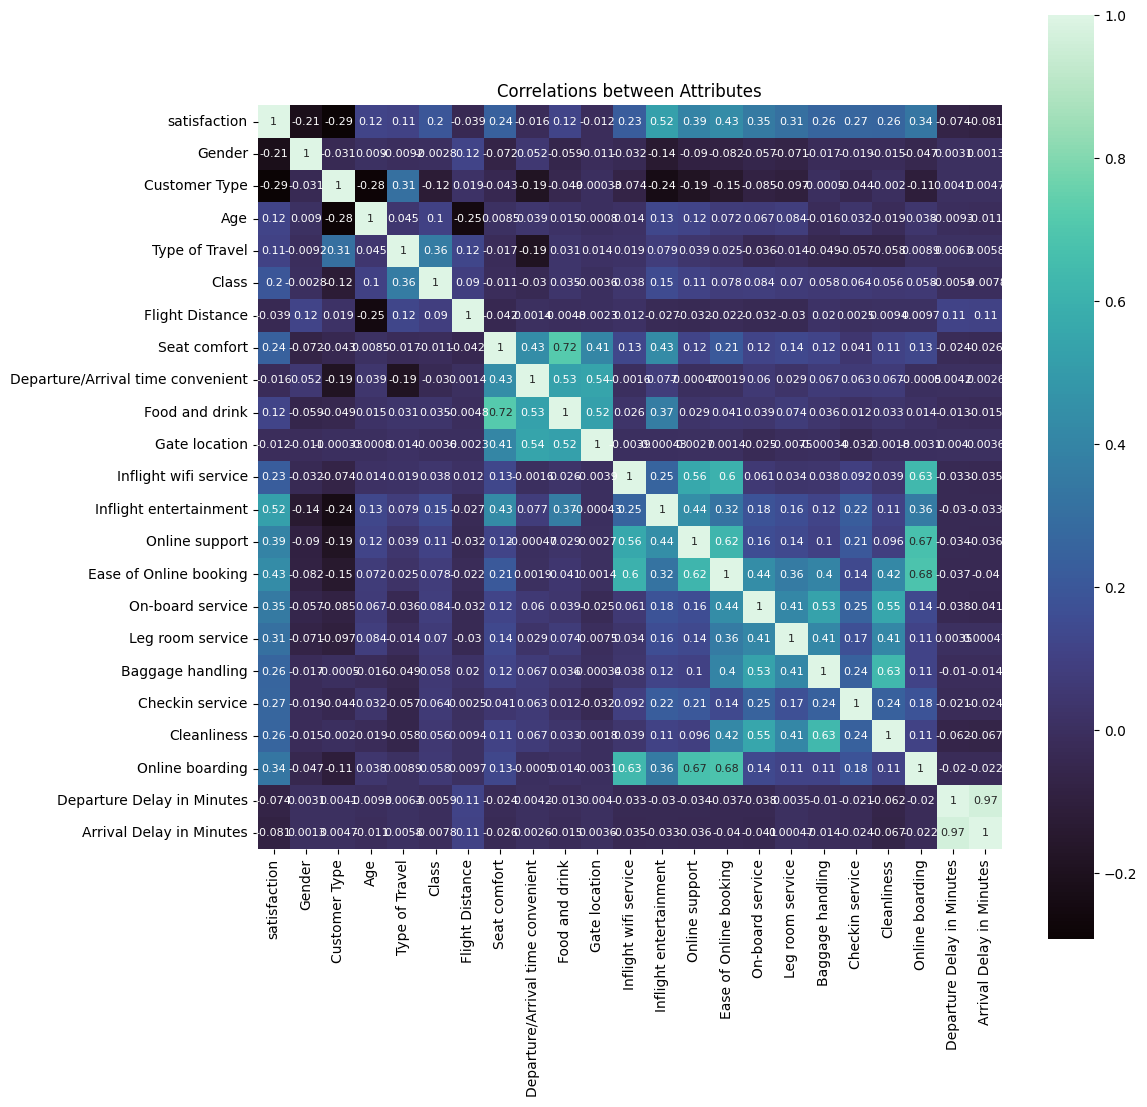

In [34]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(df.corr (), square = True, cbar = True, annot = True, cmap="mako", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

Yukarda bahsettiğimiz etki eden değişkenleri ayrıca heatmap üzerinden de bulabiliriz. "satisfaction" sütunu için pozitif korelasyon gösteren değerler net şekilde görülmektedir.
- `Seat Comfort`
- `Inflight wifi service`
- `Inflight entertainment` (en etkili özellik)
- `Online support`
- `Ease of online booking`
- `On-board service`
- `Leg room service`
- `Bagging handling`
- `Checkin Service`
- `Cleanliness`
- `Online Boarding`

## ML Prediction

Asıl modellemeye geçmeden önce veri setinin test set ve train set olarak ayrılması gerekmektedir. 

In [35]:
X = df.drop('satisfaction', axis=1)
y = df.satisfaction

Tahmin yapacağımız için "satisfaction" sütununu artık drop etmemiz lazım.

In [36]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64

y değişkenine sadece "satisfaction" sütununda bulunan verileri atadık. Tahminlerimizi yaptıktan sonra doğruluklarını kontrol etmek için bu değişkeni kullanacağız.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Modeli eğitmek için veri setimizi train ve test set olarak ayırmamız gerekmektedir. %70'i eğitim verisi olarak atamak doğru bir seçenek gibi görünüyor.

In [38]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
52358,1,1,25,1,0,2502,3,3,3,1,...,4,2,4,5,5,5,4,2,0,0.0
2840,1,0,32,0,0,1423,1,3,1,3,...,5,5,1,3,3,4,3,5,0,0.0
82848,1,0,25,1,1,3773,2,2,2,2,...,3,3,2,5,5,3,5,3,0,0.0
115679,0,0,53,1,1,1686,3,1,3,3,...,5,5,5,5,5,4,5,5,0,2.0
48470,0,1,36,1,1,2932,2,2,2,4,...,4,4,3,2,3,3,4,4,2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40320,1,1,22,1,1,1432,0,0,0,3,...,1,1,5,4,5,2,2,1,0,19.0
19785,0,0,10,0,0,2007,2,5,3,3,...,1,5,4,5,4,1,4,1,127,133.0
124671,0,0,67,1,2,814,5,1,1,1,...,4,5,5,5,5,1,5,5,14,5.0
104411,0,0,60,1,1,2642,4,4,2,4,...,5,4,4,4,4,5,4,5,0,0.0


Dediğimiz gibi veri setimizin %70'i eğitim seti olarak atandı.

In [39]:
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
10408,1,0,9,0,0,1385,2,2,2,4,...,3,3,2,4,3,2,4,3,10,5.0
54961,0,1,25,1,0,2453,3,3,3,4,...,1,1,4,4,4,3,3,1,0,0.0
16796,0,0,35,0,2,1721,1,1,1,1,...,4,4,4,4,4,4,4,3,81,98.0
74884,0,0,39,1,1,292,2,3,3,3,...,3,2,2,2,2,4,2,2,0,0.0
95981,1,0,51,1,1,3026,4,4,4,4,...,5,4,4,4,4,4,4,3,22,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36834,0,0,12,0,0,1168,4,5,4,1,...,1,1,3,4,5,4,4,1,0,0.0
50753,1,1,38,1,0,1943,3,0,3,2,...,1,1,3,4,5,5,4,1,0,4.0
22807,1,0,41,0,0,1413,3,3,3,1,...,4,4,5,4,1,3,3,4,25,68.0
40482,1,1,27,1,1,1986,0,0,0,5,...,4,4,5,4,4,4,5,4,0,0.0


Aynı şekilde %30'u da test seti olarak atanadı.

In [40]:
y_train

52358     0
2840      0
82848     1
115679    1
48470     0
         ..
40320     1
19785     0
124671    1
104411    1
79935     1
Name: satisfaction, Length: 90640, dtype: int64

In [41]:
y_test

10408    0
54961    0
16796    1
74884    0
95981    1
        ..
36834    1
50753    0
22807    0
40482    1
75452    0
Name: satisfaction, Length: 38847, dtype: int64

Veri setimizi gerekli setlere böldüğümüze göre artık sınıflandırmaya başlayabiliriz.

### Decision Tree

In [42]:
dtc = DecisionTreeClassifier(random_state=42)

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_dtc_test_dt = dtc.predict(X_test)
y_dtc_train_dt = dtc.predict(X_train)

In [45]:
dt_acc= accuracy_score(y_test, y_dtc_test_dt)
print('Accuracy by Decision Tree : ',dt_acc) 

Accuracy by Decision Tree :  0.9348984477565835


Test veri seti üzerinde modelin performasını değerlendirdik ve 0.93 gibi güzel bir sonuç elde ettik.

In [46]:
print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_dtc_test_dt, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     17443
           1       0.94      0.94      0.94     21404

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



### Logistic Regression

In [47]:
model = LogisticRegression(max_iter =10000)

In [48]:
model

LogisticRegression(max_iter=10000)

In [49]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
X_train_prediction = model.predict(X_train)

In [51]:
X_test_prediction = model.predict(X_test)
lr_acc = accuracy_score(X_test_prediction, y_test)
print("Accuracy score for test data: ", lr_acc)

Accuracy score for test data:  0.834942209179602


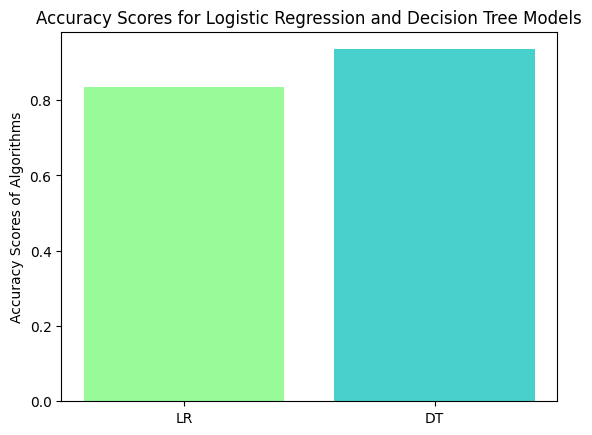

In [52]:
models = ['LR', 'DT']
acc_scores = [lr_acc, dt_acc]

plt.bar(models, acc_scores, color=['palegreen', 'mediumturquoise'])
plt.ylabel("Accuracy Scores of Algorithms")
plt.title("Accuracy Scores for Logistic Regression and Decision Tree Models")
plt.show()

Net bir şekilde görüyoruz ki Decision Tree modeli ile daha iyi sonuçlar alacağız. O yüzden model olarak Decision Tree'yi seçmek doğru bir seçenecek olacaktır.

Veri setimizden bağımsız 10 tane de sentetik veriyi classificate edelim.

In [53]:
sentetic_data = [[0, 1, 24, 0, 1, 500, 4, 2, 3, 4, 2, 4, 3, 4, 2, 2, 3, 4, 4, 5, 0, 0],
                [1, 0, 44, 1, 0, 5000, 2, 1, 2, 2, 1, 1, 0, 3, 1, 5, 5, 2, 2, 4, 10, 100],
                [0, 1, 20, 1, 2, 1000, 2, 4, 1, 5, 5, 2, 4, 1, 5, 1, 4, 2, 5, 1, 100, 150],
                [1, 1, 10, 0, 1, 2500, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 40, 45],
                [0, 0, 60, 1, 0, 982, 3, 2, 3, 4, 2, 4, 3, 4, 2, 2, 3, 2, 3, 2, 144, 150],
                [0, 1, 34, 0, 1, 754, 2, 4, 1, 4, 0, 2, 4, 0, 4, 3, 5, 2, 3, 4, 0, 0],
                [0, 1, 13, 1, 2, 658, 4, 3, 4, 3, 5, 4, 2, 4, 4, 2, 1, 2, 3, 1, 190, 180],
                [1, 1, 54, 1, 0, 590, 1, 1, 2, 5, 4, 1, 2, 1, 3, 2, 2, 5, 5, 1, 155, 162],
                [1, 0, 37, 0, 2, 940, 5, 5, 4, 4, 2, 5, 2, 4, 3, 2, 4, 4, 4, 2, 1000, 900],
                [0, 0, 77, 0, 1, 2000, 2, 5, 4, 4, 4, 3, 5, 5, 2, 2, 4, 4, 4, 2, 0, 0]]



Burada gördüğümüz veriler veri setimizde bulunan sütunlara uygun şekilde sıralanmıştır.

Şimdi de bu verileri modelimize gönderiyoruz.

In [54]:
pred = dtc.predict(sentetic_data)
print(pred)

for i in range(len(pred)):
    print("For ", i+1, ". customer:")
    if pred[i] == 0:
        print("Customer is dissatisfied\n")
    else:
         print("Customer is satisfied\n")

[1 1 0 1 0 0 0 0 1 1]
For  1 . customer:
Customer is satisfied

For  2 . customer:
Customer is satisfied

For  3 . customer:
Customer is dissatisfied

For  4 . customer:
Customer is satisfied

For  5 . customer:
Customer is dissatisfied

For  6 . customer:
Customer is dissatisfied

For  7 . customer:
Customer is dissatisfied

For  8 . customer:
Customer is dissatisfied

For  9 . customer:
Customer is satisfied

For  10 . customer:
Customer is satisfied



C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Elde ettiğimiz çıktıya baktığımızda 5 müşterinin satisfied olduğu geri kalan 5 kişinin de dissatisfied olduğu görülmektedir.

Aşağıda verilen iki veri satırına baktığımızda veri setimizde ilk 2 müşterinin verileri bulunmaktadır. Bu iki satırı kullanarak modelin doğru çalışıp çalışmadığını kontrol ediyoruz.

In [55]:
sen2= [[0,1,65,0,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0], ## real datas
       [1,1,47,0,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305]]

pred2 = dtc.predict(sen2)
print(pred2)


[1 1]


C:\Users\Bb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Çıktımıza baktığımızda ilk iki müşterilerin de "satisfied" olduğu gözlemlenmektedir. Bu çıktı doğru bir çıktıdır.

In [56]:
results = pd.DataFrame(
{
    "Predicted": y_dtc_test_dt,
    "Truth": y_test,
    "Accuracy": y_dtc_test_dt == y_test
})

Bu adımda test seti predict edildi. Şimdi de gerçek değer ile elde ettiğimiz değerleri karşılaştıralım. Eğer aynı değeri aldıysak "True" değeri dönecek fakat ayni değer predict edilmediyse "False" değeri dönecek.

In [57]:
results

,Predicted,Truth,Accuracy
10408,0,0,True
54961,0,0,True
16796,1,1,True
74884,0,0,True
95981,1,1,True
...,...,...,...
36834,1,1,True
50753,0,0,True
22807,0,0,True
40482,1,1,True


Test set için prediction tamamlandı. Bu demek oluyor ki 38847 satırın %93'ü doğru tahmin edilmiş. 

Sırada Train set için predict yapılacak. Yukarda bahsedildiği şekilde bir dataframe şekildinde gösterilecek.

In [58]:
results2 = pd.DataFrame(
{
    "Predicted": y_dtc_train_dt,
    "Truth": y_train,
    "Accuracy": y_dtc_train_dt == y_train
})

In [59]:
results2

,Predicted,Truth,Accuracy
52358,0,0,True
2840,0,0,True
82848,1,1,True
115679,1,1,True
48470,0,0,True
...,...,...,...
40320,1,1,True
19785,0,0,True
124671,1,1,True
104411,1,1,True


Aynı işlemi train set için de uygulandı. Ve elde edilen sonuç ve işlemin kodu Figür 46’da 
gösterilmiştir. Bu demek oluyor ki train set içerisinde bulunan 90640 verinin %93’ü doğru tahmin 
edilmiştir.

# Conclusion

Veri setinin analizi için gerekli bütün adımları tamamlamış olduk. Artık herhangi bir müşterinin 
uçuş bilgilerini girerek memnun olup olmadığını kontrol edebiliriz. Proje boyunca yapılan 
analizlerle gelecek şirket politikasını ya da müşteri profillerine göre kampanya ve özel teklifler 
hazırlayarak müşteri memnuniyetini yükseltme adımları atılabilir. Yapılan analizlerde müşteri 
memnuniyetini etkileyen en büyük özellik “Inflight Entertainment” sisteminin olması ve 
geliştirilmesidir. Müşteri memnuniyeti bu şekilde daha fazla elde edilebilir. Ayrıca daha uygun 
maliyetli geliştirme olarak “Seat Comfort” yer alabilir. Koltuk konforunu arttırmak veya koltuğa 
entegre kafa desteği gibi iyileştirmeler yapılarak bu alanda da müşteri memnuniyeti elde edilebilir. 
Web sitesi iyileştirmesi yapılarak “Ease of online booking” ve “Online Support” hizmetleri 
geliştirilebilir. Bu sayede müşteri memnuniyetinde yeniden artış yakalanabilir. Hosteslere 
verilecek ekstra farklı eğitimler sonrasına “On-boarding service” hizmetinde de yükseliş 
sağlanabilir.  